# Datos descargados de: https://www.pmel.noaa.gov/tao/drupal/disdel/


---


# PERFIL VERTICAL DE "ANOMALÍAS ESTACIONALES DE TEMPERATURA SUB SUPERFICIAL DEL MAR" DE LA BOYA UBICADA EN 0N - 170W

---

In [105]:
# Conectando google drive con colab:
#-------------------------------------
from google.colab import drive
drive.mount('/content/drive/')
#-------------------------------------
import os
path = '/content/drive/MyDrive/Colab Notebooks/OCEANOGRAFIA/BOYA 0N170W/' # Ruta del directorio de trabajo
os.chdir(path)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [106]:
import pandas as pd
import xarray as xr
import numpy as np

In [107]:
Tsub = xr.open_dataset(path + 't0n170w_dy.cdf',
                       drop_variables = ['time_bnds','ST_6020','QT_5020','ZSST_2003','depzsst']) # Eliminamos variable inservibles.
Tsub['time'] = pd.date_range('1988-05-16', '2023-07-10', freq = 'D')
Tsub

<xarray.Dataset>
Dimensions:  (time: 12839, depth: 20, lat: 1, lon: 1)
Coordinates:
  * time     (time) datetime64[ns] 1988-05-16 1988-05-17 ... 2023-07-10
  * depth    (depth) float32 1.0 5.0 9.0 10.0 13.0 ... 200.0 250.0 300.0 500.0
  * lat      (lat) float32 0.0
  * lon      (lon) float32 190.0
Data variables:
    T_20     (time, depth, lat, lon) float32 ...
Attributes:
    platform_code:                0n170w
    site_code:                    0n170w
    wmo_platform_code:            51010
    array:                        TAO/TRITON
    Request_for_acknowledgement:  If you use these data in publications or pr...
    Data_Source:                  Global Tropical Moored Buoy Array Project O...
    File_info:                    Contact: Dai.C.McClurg@noaa.gov
    missing_value:                1e+35
    _FillValue:                   1e+35
    CREATION_DATE:                07:45 12-JUL-2023

In [108]:
# Eliminamos las profundidades con pocos datos
profundidades_eliminar = [5,9,10,13,49,53,103,153,175]
ds = Tsub.drop_sel(depth=profundidades_eliminar)

In [109]:
# En este caso vamos a eliminar lat y lon ya que no lo utilizaremos:
ds = ds.sel(lat=ds.lat, lon=ds.lon, method='nearest')
# Elimina las dimensiones que no deseas (lat y lon)
ds = ds.squeeze(drop=True)
ds

<xarray.Dataset>
Dimensions:  (time: 12839, depth: 11)
Coordinates:
  * time     (time) datetime64[ns] 1988-05-16 1988-05-17 ... 2023-07-10
  * depth    (depth) float32 1.0 25.0 50.0 75.0 ... 200.0 250.0 300.0 500.0
Data variables:
    T_20     (time, depth) float32 ...
Attributes:
    platform_code:                0n170w
    site_code:                    0n170w
    wmo_platform_code:            51010
    array:                        TAO/TRITON
    Request_for_acknowledgement:  If you use these data in publications or pr...
    Data_Source:                  Global Tropical Moored Buoy Array Project O...
    File_info:                    Contact: Dai.C.McClurg@noaa.gov
    missing_value:                1e+35
    _FillValue:                   1e+35
    CREATION_DATE:                07:45 12-JUL-2023

In [110]:
# Calcular el promedio climatológico de cada mes del año
year_inicio = 1991
year_fin = 2020
clim = ds.sel(time=slice(f'{year_inicio}-01-01', f'{year_fin}-12-31')).groupby('time.month').mean(dim='time')
clim

<xarray.Dataset>
Dimensions:  (depth: 11, month: 12)
Coordinates:
  * depth    (depth) float32 1.0 25.0 50.0 75.0 ... 200.0 250.0 300.0 500.0
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    T_20     (month, depth) float32 27.52 27.44 27.45 ... 13.03 11.73 8.293
Attributes:
    platform_code:                0n170w
    site_code:                    0n170w
    wmo_platform_code:            51010
    array:                        TAO/TRITON
    Request_for_acknowledgement:  If you use these data in publications or pr...
    Data_Source:                  Global Tropical Moored Buoy Array Project O...
    File_info:                    Contact: Dai.C.McClurg@noaa.gov
    missing_value:                1e+35
    _FillValue:                   1e+35
    CREATION_DATE:                07:45 12-JUL-2023

In [111]:
# Calcular la anomalía diaria en relación al promedio climatológico
anom = ds.groupby('time.month') - clim
anom

<xarray.Dataset>
Dimensions:  (time: 12839, depth: 11)
Coordinates:
  * time     (time) datetime64[ns] 1988-05-16 1988-05-17 ... 2023-07-10
  * depth    (depth) float32 1.0 25.0 50.0 75.0 ... 200.0 250.0 300.0 500.0
    month    (time) int64 5 5 5 5 5 5 5 5 5 5 5 5 5 ... 6 6 7 7 7 7 7 7 7 7 7 7
Data variables:
    T_20     (time, depth) float32 -0.8383 nan -0.7058 ... -0.2292 0.2192

In [112]:
year_inicio = 1991
year_fin = 2020
# Calcula la climatología estacional de temperatura subsuperficial
clim_seasonal = ds.sel(time=slice(f'{year_inicio}-01-01', f'{year_fin}-12-31')).groupby('time.season').mean(dim='time')
clim_seasonal

<xarray.Dataset>
Dimensions:  (depth: 11, season: 4)
Coordinates:
  * depth    (depth) float32 1.0 25.0 50.0 75.0 ... 200.0 250.0 300.0 500.0
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    T_20     (season, depth) float32 27.57 27.44 27.4 ... 12.92 11.74 8.232
Attributes:
    platform_code:                0n170w
    site_code:                    0n170w
    wmo_platform_code:            51010
    array:                        TAO/TRITON
    Request_for_acknowledgement:  If you use these data in publications or pr...
    Data_Source:                  Global Tropical Moored Buoy Array Project O...
    File_info:                    Contact: Dai.C.McClurg@noaa.gov
    missing_value:                1e+35
    _FillValue:                   1e+35
    CREATION_DATE:                07:45 12-JUL-2023

# GRÁFICA DE LA CLIMATOLOGÍA ESTACIONAL

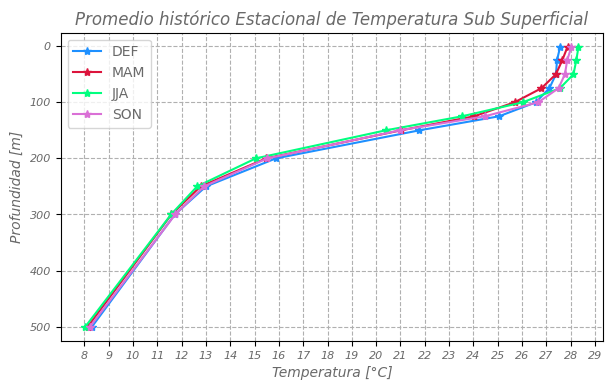

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(7, 4))
sns.set_palette("pastel")

# Trazar el gráfico con los ejes intercambiados
clim_seasonal.T_20.sel(season='DJF').plot(y='depth', marker='*', label = 'DEF',color='dodgerblue')
clim_seasonal.T_20.sel(season='MAM').plot(y='depth', marker='*', label = 'MAM',color='crimson')
clim_seasonal.T_20.sel(season='JJA').plot(y='depth', marker='*', label = 'JJA',color='springgreen')
clim_seasonal.T_20.sel(season='SON').plot(y='depth', marker='*', label = 'SON',color='orchid')

plt.title(f'Promedio histórico Estacional de Temperatura Sub Superficial',
              style="oblique", fontsize=12, color = 'dimgrey')
#-------------#-------------#-------------#-------------#-------------#-------------
# ESTILO:
plt.xticks(fontsize = 8,  style="oblique",color = 'dimgrey')
plt.yticks(fontsize = 8,  style="oblique",color = 'dimgrey')
plt.xlabel('Temperatura [°C]',  style="oblique",color = 'dimgrey')
plt.ylabel('Profundidad [m]',  style="oblique",color = 'dimgrey')
plt.grid(linestyle='--')
# Invertir el eje y
plt.legend(labelcolor='dimgrey')
plt.gca().invert_yaxis()
#-------------#-------------#-------------#-------------#-------------#-------------
# Mostrar solo valores enteros en el eje x
plt.xticks(ticks=range(int(min(clim_seasonal.T_20.sel(season='DJF'))), int(max(clim_seasonal.T_20.sel(season='DJF'))) + 3,1))
fig.savefig(path + f'Clim_EST.jpg',
                transparent = False, pad_inches = 0.1, dpi = 900, bbox_inches = 'tight')
plt.show()

In [114]:
# Calculando las anomalías estacionales de temperatura subsuperficial
anomalies_seasonal = anom.resample(time = 'QS-Mar').mean()
anomalies_seasonal

<xarray.Dataset>
Dimensions:  (depth: 11, time: 142)
Coordinates:
  * depth    (depth) float32 1.0 25.0 50.0 75.0 ... 200.0 250.0 300.0 500.0
  * time     (time) datetime64[ns] 1988-03-01 1988-06-01 ... 2023-06-01
Data variables:
    T_20     (time, depth) float32 -0.9321 nan -0.9246 ... -0.04122 0.122

In [115]:
anomalies_seasonal = anomalies_seasonal.transpose('depth','time')
anomalies_seasonal = anomalies_seasonal['T_20']
anomalies_seasonal

<xarray.DataArray 'T_20' (depth: 11, time: 142)>
array([[-0.9320688 , -1.4026436 , -2.6496782 , ..., -0.82283866,
         0.12325088,  0.7991919 ],
       [        nan,         nan,         nan, ..., -0.75915   ,
         0.16806345,  0.82202387],
       [-0.9245995 , -1.2646939 , -1.2005577 , ..., -0.74494994,
         0.29608566,  0.8939039 ],
       ...,
       [-0.14601934,  0.06147426, -0.54772824, ...,  0.15166873,
         0.20005323, -0.00626848],
       [-0.1813811 ,  0.15247911, -0.24094804, ..., -0.12705287,
         0.03115927, -0.04121675],
       [ 0.27376348,  0.30222026, -0.2756742 , ..., -0.0822213 ,
         0.17178138,  0.12201766]], dtype=float32)
Coordinates:
  * depth    (depth) float32 1.0 25.0 50.0 75.0 ... 200.0 250.0 300.0 500.0
  * time     (time) datetime64[ns] 1988-03-01 1988-06-01 ... 2023-06-01

# GRÁFICA DE LA ANOMALÍA ESTACIONAL

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

def Anom_Esta(data,year):
  fig, ax = plt.subplots(figsize=(7, 4))
  # Trazar el gráfico con los ejes intercambiados
  data.sel(time=f'{year}-03-01',method='nearest').plot(y='depth', marker='*', label = 'DEF',color='dodgerblue')
  data.sel(time=f'{year}-06-01',method='nearest').plot(y='depth', marker='o', label = 'MAM',color='crimson')
  data.sel(time=f'{year}-09-01',method='nearest').plot(y='depth', marker='+',label = 'JJA',color='springgreen')
  data.sel(time=f'{year}-12-01',method='nearest').plot(y='depth', marker='<',label = 'SON',color='orchid')

  plt.title(f'Anomalías [°C] Estacionales de Temperatura Sub Superficial\nAño: {year}',
                style="oblique", fontsize=12, color = 'dimgrey')
  #-------------#-------------#-------------#-------------#-------------#-------------
  plt.xticks(fontsize = 8,  style="oblique",color = 'dimgrey')
  plt.yticks(fontsize = 8,  style="oblique",color = 'dimgrey')
  plt.xlabel('Anomalías [°C]',  style="oblique",color = 'dimgrey')
  plt.ylabel('Profundidad [m]',  style="oblique",color = 'dimgrey')
  plt.grid(linestyle='--')
  # Invertir el eje y
  plt.legend(labelcolor='dimgrey')
  plt.gca().invert_yaxis()
  #-------------#-------------#-------------#-------------#-------------#-------------
  fig.savefig(path + f'ATSS_EST_{year}.jpg',
                  transparent = False, pad_inches = 0.1, dpi = 900, bbox_inches = 'tight')
  plt.show()

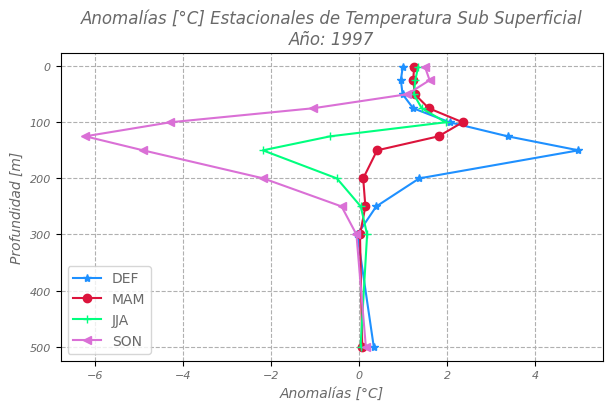

In [117]:
Anom_Esta(anomalies_seasonal,1997)

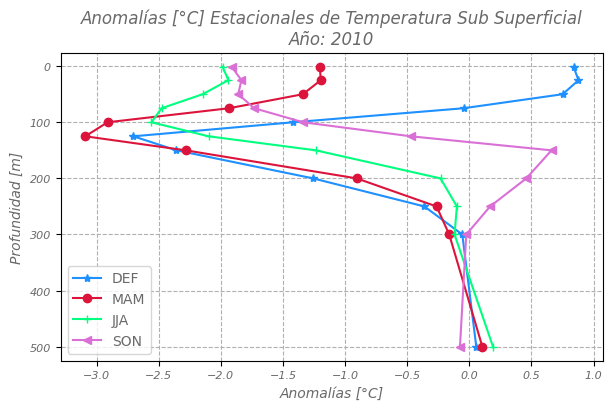

In [118]:
Anom_Esta(anomalies_seasonal,2010)

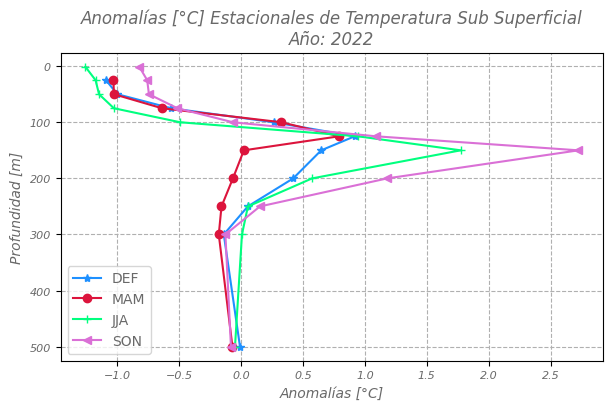

In [119]:
Anom_Esta(anomalies_seasonal,2022)

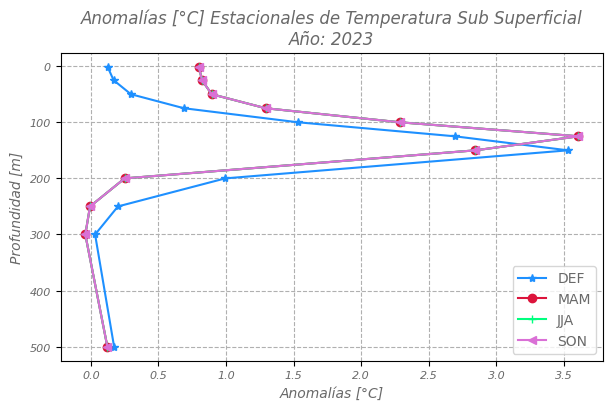

In [120]:
Anom_Esta(anomalies_seasonal,2023)



---
# Los datos utilizados se encuentran en el siguiente link:
https://drive.google.com/drive/folders/1zo4Uq3XS9KKn_I2Ei1J_FiYu4QryQnNt



---
